In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
#from google.colab import drive
#drive.mount('/content/drive')

In [14]:
resultsdir = '/home/scram-2004/Project/Our-UNet-Code/history_results/results-dynamic-median'

# Sorted Scores of Round 2 and corresponding opposite score of Round1


working with: results20231113

Cartesian Scores: [Blue line]

Below is the code for two consecutive rounds.
For 2nd round cartesian scores:
It figuring out the cartesian in-group scores among 7400 indices, keeping track of it and plotting the sorted in-group scores in blue color.
It's also plotting the polar scores of the corresponding indices from round 1 [Red Scattered Dots]

Polar Scores:

Just similar like before - opposite way around.

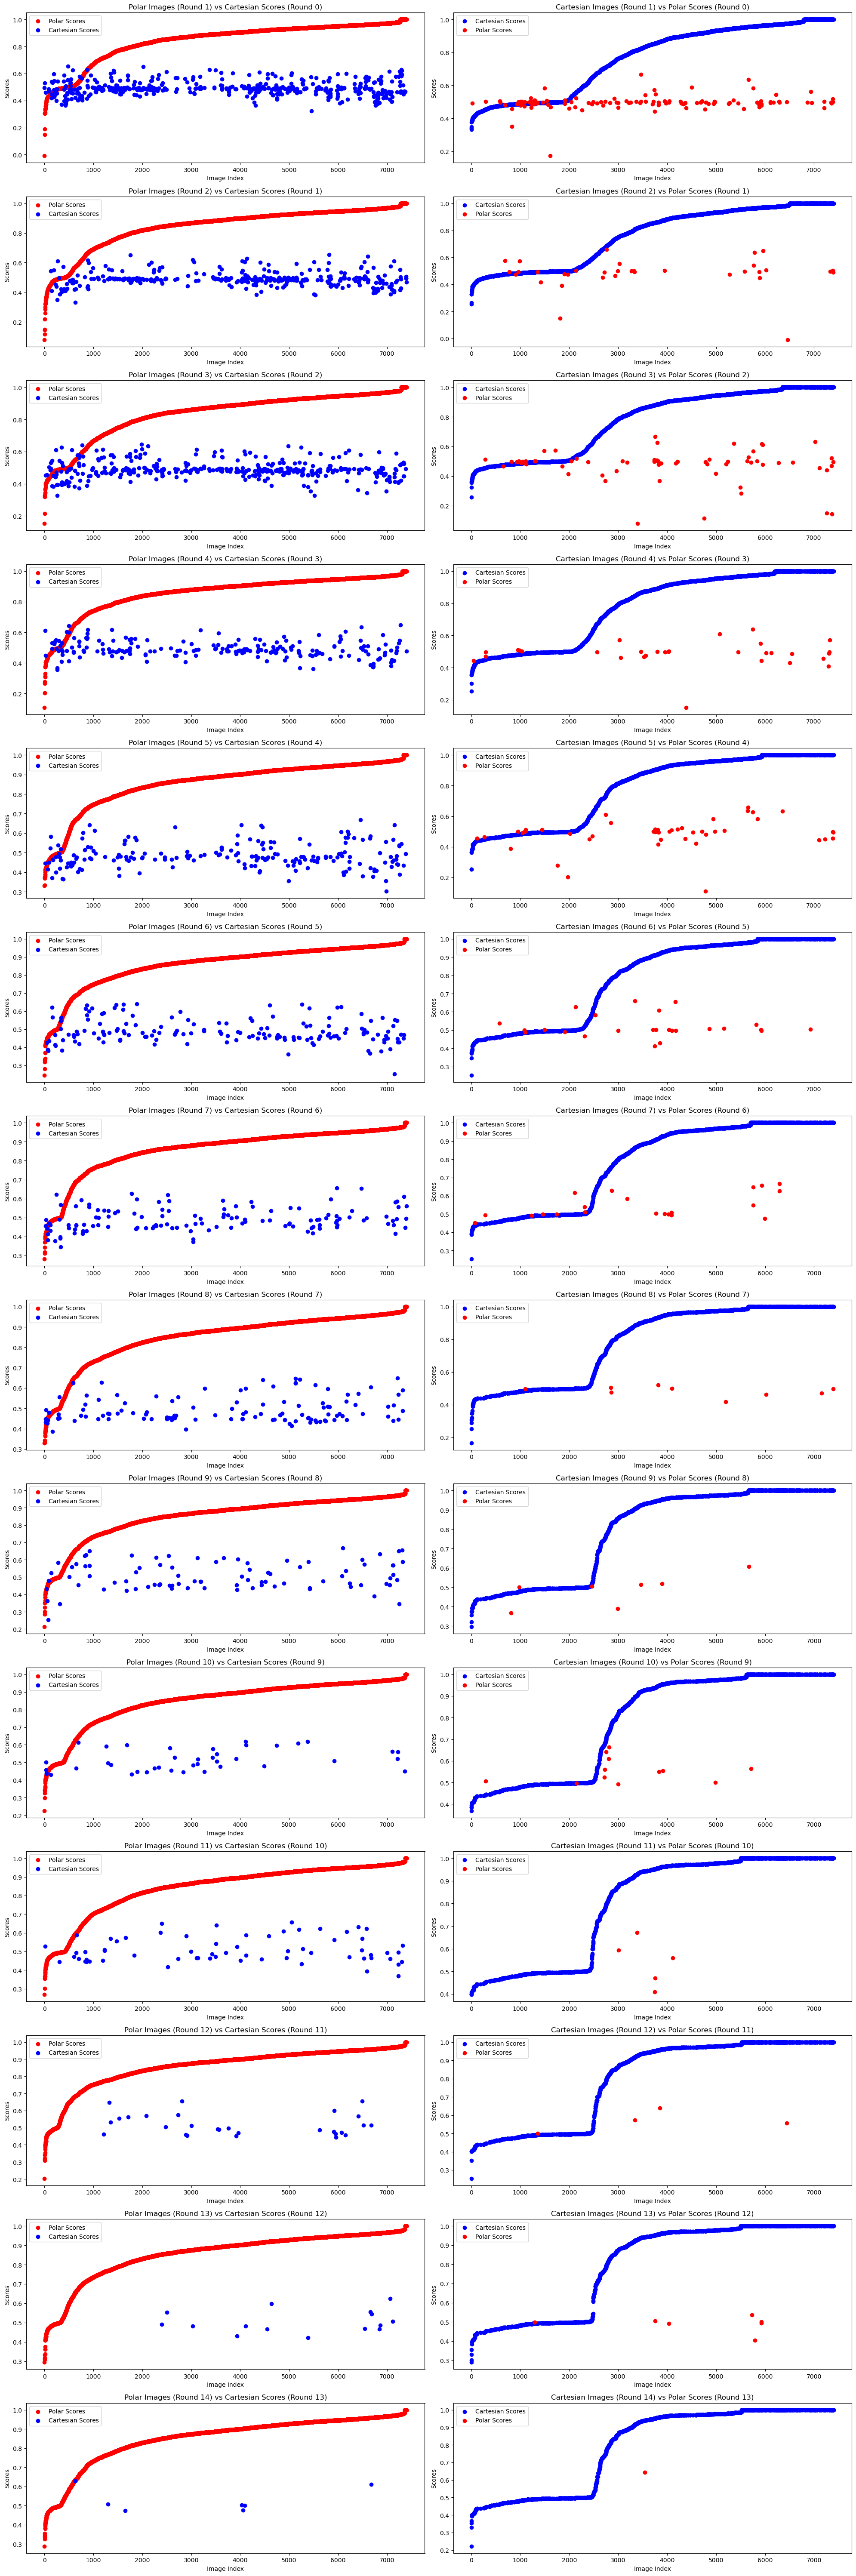

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def get_in_group_scores(matrix):
    picked_score = np.zeros(matrix.shape[0])
    for i, row in enumerate(matrix):
        subarray1, subarray2 = np.split(row, 2)
        if np.count_nonzero(subarray1) == 1:
            picked_score[i] = subarray1[subarray1 != 0][0]
        else:
            picked_score[i] = subarray2[subarray2 != 0][0]
    return picked_score


def analyze_round_pairs():
    fig, axs = plt.subplots(14, 2, figsize=(20, 60))  # 10 rows, 2 columns

    for round_pair in range(14):
        scores = []
        rounds = [round_pair, round_pair + 1]

        for round_num in rounds:
            #file_path = f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{round_num}.npy'
            file_path = os.path.join(resultsdir,('scorematrix/scorematrix_round_' + str(round_num) + '.npy'))
            matrix = np.load(file_path)
            scores.append(get_in_group_scores(matrix))

        # Determine Polar and Cartesian Scores for the second round in the pair
        polar_indices = []
        cartesian_indices = []
        #matrix = np.load(f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{rounds[1]}.npy')
        matrix = np.load(os.path.join(resultsdir,('scorematrix/scorematrix_round_'+ str(rounds[1]) + '.npy')))
        for i, row in enumerate(matrix):
            subarray1, subarray2 = np.split(row, 2)
            if np.count_nonzero(subarray1) == 1:
                polar_indices.append(i)
            else:
                cartesian_indices.append(i)

        blue_polar = []
        red_polar = []
        blue_cartesian = []
        red_cartesian = []
        #previous_matrix = np.load(f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{rounds[0]}.npy')
        previous_matrix = np.load(os.path.join(resultsdir,('scorematrix/scorematrix_round_' + str(rounds[0]) + '.npy')))
        for i in polar_indices:
            subarray1, subarray2 = np.split(previous_matrix[i], 2)
            if np.count_nonzero(subarray1) == 1:
                red_polar.append(i)
            else:
                blue_polar.append(i)
        for i in cartesian_indices:
            subarray1, subarray2 = np.split(previous_matrix[i], 2)
            if np.count_nonzero(subarray1) == 1:
                red_cartesian.append(i)
            else:
                blue_cartesian.append(i)

        # Polar Plot for each round pair
        axs[round_pair, 0].scatter(polar_indices, np.sort(scores[1][polar_indices]), color='red', label='Polar Scores')
        axs[round_pair, 0].scatter(blue_polar, scores[0][blue_polar], color='blue', label='Cartesian Scores')
        axs[round_pair, 0].set_title(f'Polar Images (Round {rounds[1]}) vs Cartesian Scores (Round {rounds[0]})')
        axs[round_pair, 0].set_xlabel('Image Index')
        axs[round_pair, 0].set_ylabel('Scores')
        axs[round_pair, 0].legend()

        # Cartesian Plot for each round pair
        axs[round_pair, 1].scatter(cartesian_indices, np.sort(scores[1][cartesian_indices]), color='blue', label='Cartesian Scores')
        axs[round_pair, 1].scatter(red_cartesian, scores[0][red_cartesian], color='red', label='Polar Scores')
        axs[round_pair, 1].set_title(f'Cartesian Images (Round {rounds[1]}) vs Polar Scores (Round {rounds[0]})')
        axs[round_pair, 1].set_xlabel('Image Index')
        axs[round_pair, 1].set_ylabel('Scores')
        axs[round_pair, 1].legend()

    plt.tight_layout()
    plt.show()

# Call the function
analyze_round_pairs()


# Sorted Out-of-group scores [Filling Min-Max]

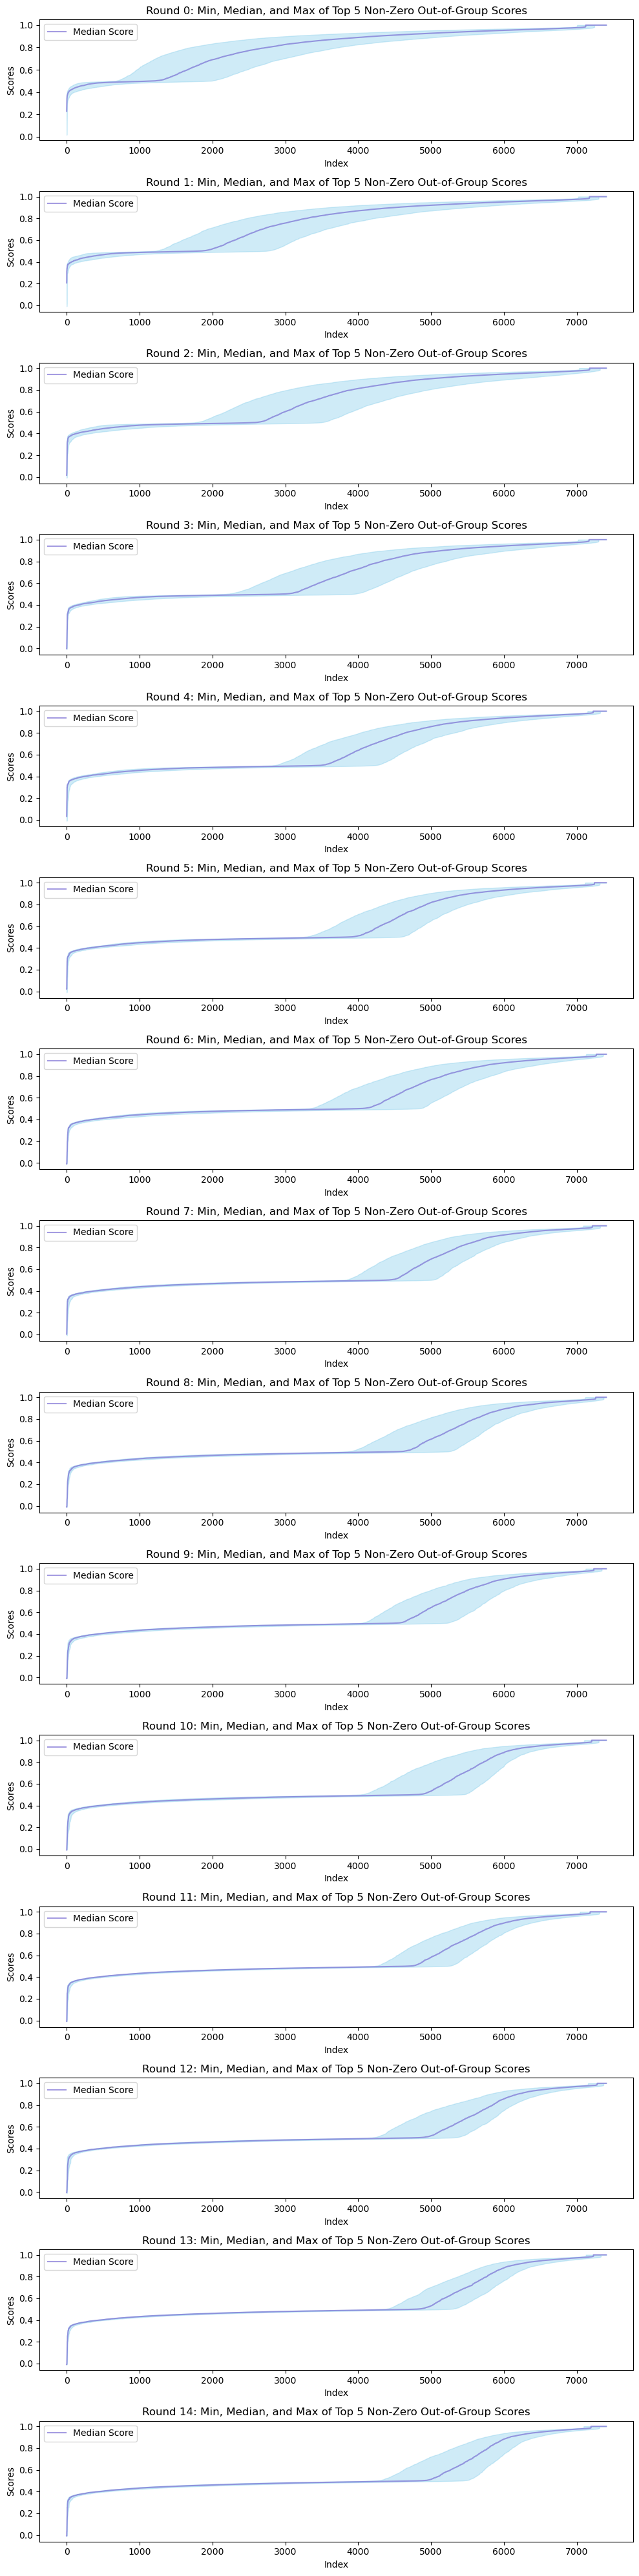

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def get_out_of_group_scores(matrix):
    out_of_group_scores = []
    for row in matrix:
        subarray1, subarray2 = np.split(row, 2)
        chosen_subarray = subarray2 if np.count_nonzero(subarray1) == 1 else subarray1
        non_zero_scores = chosen_subarray[chosen_subarray != 0]
        if len(non_zero_scores) > 5:
            non_zero_scores = np.sort(non_zero_scores)[-5:]  # Take top 5 non-zero scores
        out_of_group_scores.append(non_zero_scores)
    return out_of_group_scores

def calculate_min_median_max(scores):
    min_scores = []
    median_scores = []
    max_scores = []
    for score_set in scores:
        if len(score_set) > 0:
            min_scores.append(np.min(score_set))
            median_scores.append(np.median(score_set))
            max_scores.append(np.max(score_set))
        else:
            min_scores.append(0)
            median_scores.append(0)
            max_scores.append(0)
    return min_scores, median_scores, max_scores

def analyze_and_plot_all_rounds():
    fig, axs = plt.subplots(15, 1, figsize=(10, 40))  # 10 rows, 1 column for each round

    for round_num in range(15):
        #file_path = f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{round_num}.npy'
        file_path = os.path.join(resultsdir,('scorematrix/scorematrix_round_' + str(round_num) + '.npy'))
        matrix = np.load(file_path)
        out_of_group_scores = get_out_of_group_scores(matrix)
        min_scores, median_scores, max_scores = calculate_min_median_max(out_of_group_scores)

        axs[round_num].fill_between(range(len(min_scores)), np.sort(min_scores), np.sort(max_scores), color='skyblue', alpha=0.4)
        axs[round_num].plot(np.sort(median_scores), color='Slateblue', alpha=0.6, label='Median Score')
        axs[round_num].set_title(f'Round {round_num}: Min, Median, and Max of Top 5 Non-Zero Out-of-Group Scores')
        axs[round_num].set_xlabel('Index')
        axs[round_num].set_ylabel('Scores')
        axs[round_num].legend()

    plt.tight_layout()
    plt.show()

# Call the function
analyze_and_plot_all_rounds()



# All in-group scores and out of group scores combined

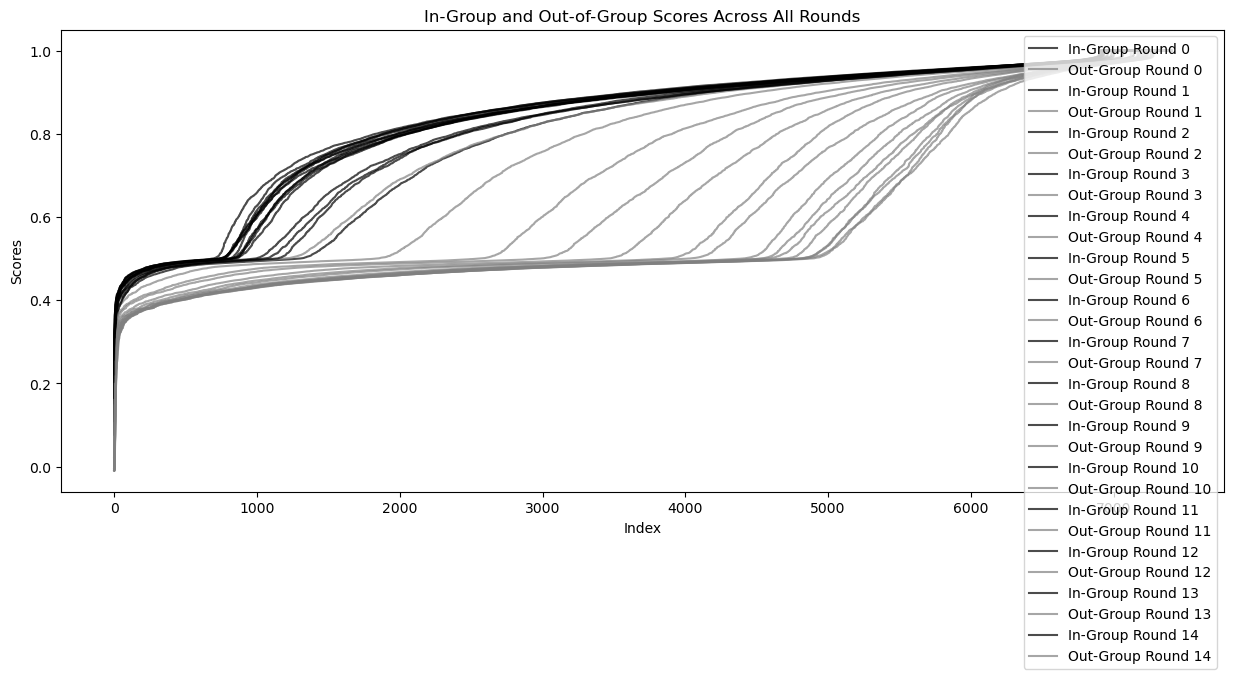

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def get_in_group_scores(matrix):
    picked_score = np.zeros(matrix.shape[0])
    for i, row in enumerate(matrix):
        subarray1, subarray2 = np.split(row, 2)
        if np.count_nonzero(subarray1) == 1:
            picked_score[i] = subarray1[subarray1 != 0][0]
        else:
            picked_score[i] = subarray2[subarray2 != 0][0]
    return picked_score

def get_out_of_group_scores(matrix):
    out_of_group_scores = []
    for row in matrix:
        subarray1, subarray2 = np.split(row, 2)
        chosen_subarray = subarray2 if np.count_nonzero(subarray1) == 1 else subarray1
        non_zero_scores = chosen_subarray[chosen_subarray != 0]
        if len(non_zero_scores) > 5:
            non_zero_scores = np.sort(non_zero_scores)[-5:]  # Take top 5 non-zero scores
        out_of_group_scores.append(non_zero_scores)
    return out_of_group_scores

def calculate_min_median_max(scores):
    min_scores = np.min(scores, axis=1)
    median_scores = np.median(scores, axis=1)
    max_scores = np.max(scores, axis=1)
    return min_scores, median_scores, max_scores

def analyze_and_plot_combined():
    plt.figure(figsize=(15, 6))

    for round_num in range(15):
        #file_path = f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{round_num}.npy'
        file_path = os.path.join(resultsdir,('scorematrix/scorematrix_round_' + str(round_num) + '.npy'))
        matrix = np.load(file_path)

        # In-group scores
        in_group_scores = get_in_group_scores(matrix)

        # Out-of-group scores
        out_of_group_scores = get_out_of_group_scores(matrix)
        min_scores, median_scores, max_scores = calculate_min_median_max(out_of_group_scores)

        # Plotting
        x_values = range(len(in_group_scores))
        plt.plot(x_values, np.sort(in_group_scores), label=f'In-Group Round {round_num}', alpha=0.7, color="black")
        plt.plot(x_values, np.sort(median_scores), label=f'Out-Group Round {round_num}', alpha=0.7, color="grey")
        #plt.fill_between(x_values, np.sort(min_scores), np.sort(max_scores), alpha=0.3, label=f'Out-of-Group Round {round_num}')

    plt.title('In-Group and Out-of-Group Scores Across All Rounds')
    plt.xlabel('Index')
    plt.ylabel('Scores')
    plt.legend()
    plt.show()

# Call the function
analyze_and_plot_combined()
